In [23]:
import anndata
import cospar as cs

In [60]:
import os

current_folder = os.getcwd()
print(current_folder)# 获取当前工作目录路径
print(os.path.abspath('.')) # 获取当前工作目录路径
parent_folder = os.path.dirname(current_folder)
print(parent_folder)
Hematopoiesis_data_folder = os.path.join(parent_folder, "Sample_with_Code/Tracing_sample/Hematopoiesis\data")
print(Hematopoiesis_data_folder)
matrix_compute_path = (Hematopoiesis_data_folder + "/part1_similarity_matrix")


d:\Dynamic\KAILIN\Github\part1_similarity_matrix
d:\Dynamic\KAILIN\Github\part1_similarity_matrix
d:\Dynamic\KAILIN\Github
d:\Dynamic\KAILIN\Github\Sample_with_Code/Tracing_sample/Hematopoiesis\data


In [59]:
adata_het = anndata.read_h5ad(Hematopoiesis_data_folder + "/Hematopoiesis_progenitor.h5ad")

In [26]:
adata_het

AnnData object with n_obs × n_vars = 5392 × 25289
    obs: 'time_info', 'state_info', 'NeuMon_fate_bias', 'NeuMon_mask', 'progenitor_Ccr7_DC', 'progenitor_Mast', 'progenitor_Meg', 'progenitor_pDC', 'progenitor_Eos', 'progenitor_Lymphoid', 'progenitor_Erythroid', 'progenitor_Baso', 'progenitor_Neutrophil', 'progenitor_Monocyte', 'sp_500_idx', 'MLPClassifier_predicted_bias', 'growth_rate_raw', 'growth_rate_smooth', 'label'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'label_colors', 'progenitor_Monocyte_colors', 'state_info_colors', 'time_info_colors', 'time_ordering'
    obsm: 'X_clone', 'X_emb', 'X_pca'

In [27]:
adata_het.obs['label']

4406          Neutrophil
4409     Neutrophil_prog
4411     Neutrophil_prog
4414          Neutrophil
4419     Neutrophil_prog
              ...       
38453    Neutrophil_prog
38455      Monocyte_prog
38459      Monocyte_prog
38464      Monocyte_prog
38465           Monocyte
Name: label, Length: 5392, dtype: category
Categories (4, object): ['Monocyte', 'Monocyte_prog', 'Neutrophil', 'Neutrophil_prog']

In [28]:
adata_het.obs['state_info']

4406     Neutrophil
4409         undiff
4411         undiff
4414     Neutrophil
4419         undiff
            ...    
38453        undiff
38455        undiff
38459        undiff
38464        undiff
38465      Monocyte
Name: state_info, Length: 5392, dtype: category
Categories (3, object): ['Monocyte', 'Neutrophil', 'undiff']

In [29]:
adata_het.obsm['X_emb'].shape

(5392, 2)

In [30]:
adata_het.X

<5392x25289 sparse matrix of type '<class 'numpy.float32'>'
	with 8794573 stored elements in Compressed Sparse Row format>

In [31]:
import scipy.sparse as sp

# 将adata.X转换为稀疏矩阵类型
sparse_X = sp.csr_matrix(adata_het.X.astype(float))
adata_het.X=sparse_X


import scipy.sparse as sp

if sp.issparse(adata_het.X):
    print("adata.X is a sparse matrix")
else:
    print("adata.X is not a sparse matrix")


adata.X is a sparse matrix


In [32]:
import sys
sys.path.append(matrix_compute_path)      # 添加函数文件位置
import matrix                              # 导入函数文件

In [33]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.sparse as ssp

from cospar.tmap import _tmap_core as tmap_core
from cospar.tmap import _utils as tmap_util

from cospar import help_functions as hf
from cospar import logging as logg
from cospar import settings
from cospar import tool as tl
import os

distance_matrix = matrix.Hematopoiesis_distance_matrix(adata_het)

--> Compute similarity matrix: computing new; beta=0.1
Smooth round: 1
--> Time elapsed: 0.1630876064300537
Smooth round: 2
--> Time elapsed: 0.0682528018951416
Smooth round: 3
--> Time elapsed: 0.36957287788391113
--> Orignal sparsity=0.24194253603536175, Thresholding
--> Final sparsity=0.15743729445315183
similarity matrix truncated (Smooth round=3):  0.27530908584594727
Smooth round: 4
--> Time elapsed: 0.7077414989471436
--> Orignal sparsity=0.389852410759098, Thresholding
--> Final sparsity=0.2441725267238419
similarity matrix truncated (Smooth round=4):  0.2895934581756592
Smooth round: 5
--> Time elapsed: 0.9838824272155762
--> Orignal sparsity=0.48158006503755424, Thresholding
--> Final sparsity=0.3207093196096646
similarity matrix truncated (Smooth round=5):  0.31397223472595215
--> Save the matrix at every 5 rounds
Smooth round: 6
--> Time elapsed: 1.1433100700378418
--> Orignal sparsity=0.5508917279913532, Thresholding
--> Final sparsity=0.3870674160642429
similarity matrix 

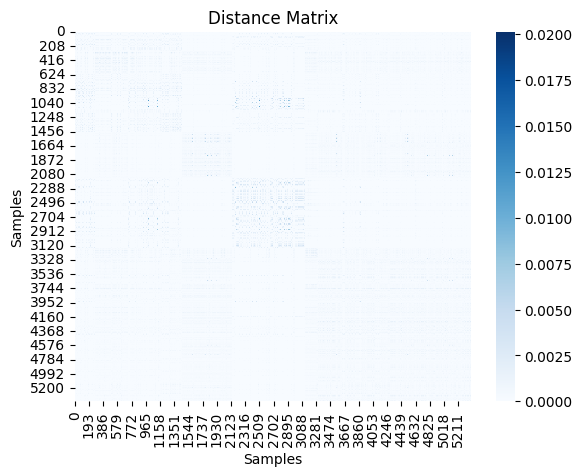

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse

# 假设 similarity_matrix 是你的稀疏矩阵数据

# 将稀疏矩阵转换为非稀疏矩阵
dense_matrix = distance_matrix.toarray()

# 绘制热图
sns.heatmap(dense_matrix, cmap='Blues')

# 添加标题和标签
plt.title('Distance Matrix')
plt.xlabel('Samples')
plt.ylabel('Samples')

# 显示热图
plt.show()

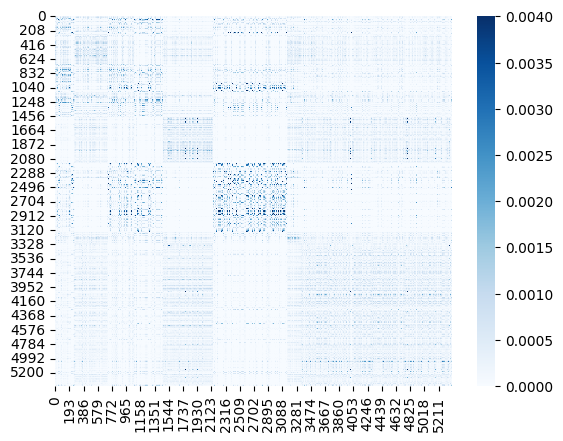

In [35]:
import seaborn as sns

# 假设你已经有了一个稠密矩阵 dense_matrix

# 设置热图的上下限
vmin = 0  # 最小值
vmax = 0.004  # 最大值

# 绘制热图
sns.heatmap(dense_matrix, cmap='Blues', vmin=vmin, vmax=vmax)

# 显示图形
plt.show()

In [36]:
print(Hematopoiesis_data_folder)

d:\Dynamic\KAILIN\Github\Sample_with_Code\Tracing_sample\Hematopoiesis\data


In [61]:
import scipy.io
import anndata

scipy.io.savemat(Hematopoiesis_data_folder+'/distance_matrix.mat', {'distance_matrix': distance_matrix})
#dense_matrix_pd = pd.DataFrame(dense_matrix)
#dense_matrix_pd.to_csv(rf'{Hematopoiesis_data_folder}\Hematopoiesis_distance_matrix.csv', index=False)

In [62]:
Hematopoiesis_embedding = pd.DataFrame(adata_het.obsm['X_emb'])
Hematopoiesis_embedding.to_csv(rf'{Hematopoiesis_data_folder}/blood_emb.csv', index=False)

In [63]:
Hematopoiesis_label = pd.DataFrame(adata_het.obs['label'])
Hematopoiesis_label.to_csv(rf'{Hematopoiesis_data_folder}/blood_label.csv', index=False)

In [64]:
import pandas as pd

# 读取blood_emb.csv和blood_label.csv文件
emb_df = pd.read_csv(rf'{Hematopoiesis_data_folder}/blood_emb.csv')
label_df = pd.read_csv(rf'{Hematopoiesis_data_folder}/blood_label.csv')

# 合并两个DataFrame
merged_df = pd.concat([emb_df, label_df], axis=1)

merged_df = merged_df.rename(columns={'0': 'X', '1': 'Y', 'Var4': 'predict'})


# 将合并后的DataFrame保存为新的csv文件
merged_df.to_csv(rf'{Hematopoiesis_data_folder}/merged_data.csv', index=False)

In [65]:
merged_df

,X,Y,label
0,594.452,-1158.758,Neutrophil
1,237.133,-87.437,Neutrophil_prog
2,475.359,-490.717,Neutrophil_prog
3,593.670,-1099.153,Neutrophil
4,589.315,-692.950,Neutrophil_prog
...,...,...,...
5387,57.620,392.159,Neutrophil_prog
5388,537.312,195.885,Monocyte_prog
5389,980.435,0.662,Monocyte_prog
5390,663.505,337.218,Monocyte_prog


#Reprogrammed

In [2]:
import anndata
import cospar as cs

import os

current_folder = os.getcwd()
print(current_folder)# 获取当前工作目录路径
print(os.path.abspath('.')) # 获取当前工作目录路径
parent_folder = os.path.dirname(current_folder)
print(parent_folder)
Rep_data_folder = os.path.join(parent_folder, "Sample_with_Code/Tracing_sample/Reprogramming/data")
print(Rep_data_folder)
matrix_compute_path = (Rep_data_folder + "/part1_similarity_matrix")


d:\Dynamic\KAILIN\Github\part1_similarity_matrix
d:\Dynamic\KAILIN\Github\part1_similarity_matrix
d:\Dynamic\KAILIN\Github
d:\Dynamic\KAILIN\Github\Sample_with_Code/Tracing_sample/Reprogramming/data


In [3]:
adata_rep = anndata.read_h5ad(Rep_data_folder + "/reprogramming_1.h5ad")

In [4]:
adata_rep

AnnData object with n_obs × n_vars = 2259 × 28001
    obs: 'time_info', 'state_info', 'reprogram_trajectory', 'failed_trajectory', 'Reference_fate_bias', 'barcode_day0', 'barcode_day3', 'barcode_day13', 'barcode_all', 'label'
    uns: 'clonal_time_points', 'clone_id', 'data_des', 'label_colors', 'state_info_colors', 'time_info_colors', 'time_ordering'
    obsm: 'X_clone', 'X_clone_Concat_D0D3', 'X_clone_Concat_D0D3D13', 'X_clone_D0', 'X_clone_D13', 'X_clone_D3', 'X_clone_NonConcat_D0D3D13', 'X_emb', 'X_pca'

In [5]:
import scipy.sparse as sp

# 将adata.X转换为稀疏矩阵类型
sparse_X = sp.csr_matrix(adata_rep.X.astype(float))
adata_rep.X=sparse_X


import scipy.sparse as sp

if sp.issparse(adata_rep.X):
    print("adata.X is a sparse matrix")
else:
    print("adata.X is not a sparse matrix")


adata.X is a sparse matrix


In [6]:
import sys
sys.path.append(matrix_compute_path)      # 添加函数文件位置
import matrix                              # 导入函数文件

In [20]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.sparse as ssp

from cospar.tmap import _tmap_core as tmap_core
from cospar.tmap import _utils as tmap_util

from cospar import help_functions as hf
from cospar import logging as logg
from cospar import settings
from cospar import tool as tl
import os

distance_matrix = matrix.Reprogramming_distance_matrix(adata_rep)

--> Compute similarity matrix: computing new; beta=0.1
Smooth round: 1
--> Time elapsed: 0.005562305450439453
Smooth round: 2
--> Time elapsed: 0.024338245391845703
--> Orignal sparsity=0.10986480520297444, Thresholding
--> Final sparsity=0.10241949912219696
similarity matrix truncated (Smooth round=2):  0.05753517150878906
Smooth round: 3
--> Time elapsed: 0.0868079662322998
--> Orignal sparsity=0.3191060459357788, Thresholding
--> Final sparsity=0.22426314612682025
similarity matrix truncated (Smooth round=3):  0.053113460540771484
Smooth round: 4
--> Time elapsed: 0.14688825607299805
--> Orignal sparsity=0.5105225647015988, Thresholding
--> Final sparsity=0.32136037033313797
similarity matrix truncated (Smooth round=4):  0.05350470542907715
Smooth round: 5
--> Time elapsed: 0.19075465202331543
--> Orignal sparsity=0.6295483062095232, Thresholding
--> Final sparsity=0.4042647961104282
similarity matrix truncated (Smooth round=5):  0.05769538879394531
--> Save the matrix at every 5 ro

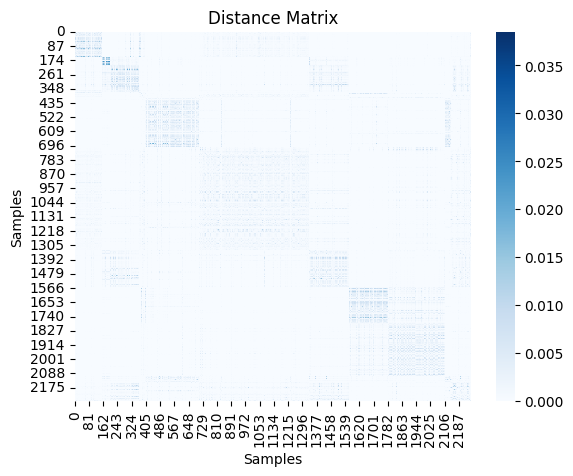

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse

# 假设 similarity_matrix 是你的稀疏矩阵数据

# 将稀疏矩阵转换为非稀疏矩阵
dense_matrix = distance_matrix.toarray()

# 绘制热图
sns.heatmap(dense_matrix, cmap='Blues')

# 添加标题和标签
plt.title('Distance Matrix')
plt.xlabel('Samples')
plt.ylabel('Samples')

# 显示热图
plt.show()

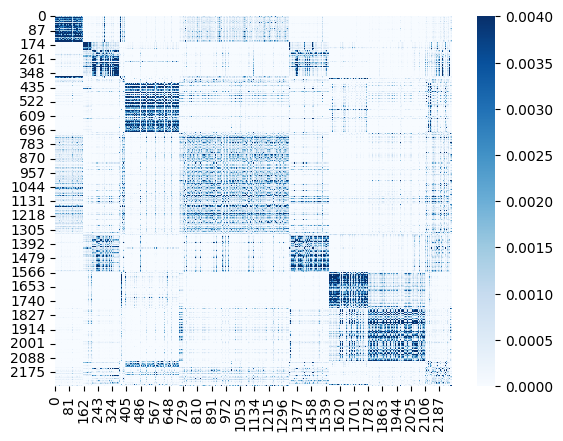

In [22]:
import seaborn as sns

# 假设你已经有了一个稠密矩阵 dense_matrix

# 设置热图的上下限
vmin = 0  # 最小值
vmax = 0.004  # 最大值

# 绘制热图
sns.heatmap(dense_matrix, cmap='Blues', vmin=vmin, vmax=vmax)

# 显示图形
plt.show()


In [23]:
print(Rep_data_folder)

d:\Dynamic\KAILIN\Github\Sample_with_Code/Tracing_sample/Reprogramming/data


In [24]:
import scipy.io
import anndata

scipy.io.savemat(Rep_data_folder+'/distance_matrix.mat', {'distance_matrix': distance_matrix})


In [25]:
Rep_embedding = pd.DataFrame(adata_rep.obsm['X_emb'])
Rep_embedding.to_csv(rf'{Rep_data_folder}/rep_emb.csv', index=False)

In [26]:
Rep_label = pd.DataFrame(adata_rep.obs['label'])
Rep_label.to_csv(rf'{Rep_data_folder}/rep_label.csv', index=False)

In [27]:
import pandas as pd

# 读取blood_emb.csv和blood_label.csv文件
emb_df = pd.read_csv(rf'{Rep_data_folder}/rep_emb.csv')
label_df = pd.read_csv(rf'{Rep_data_folder}/rep_label.csv')

# 合并两个DataFrame
merged_df = pd.concat([emb_df, label_df], axis=1)

merged_df = merged_df.rename(columns={'0': 'X', '1': 'Y', 'Var4': 'predict'})


# 将合并后的DataFrame保存为新的csv文件
merged_df.to_csv(rf'{Rep_data_folder}/merged_data.csv', index=False)

In [28]:
merged_df

,X,Y,label
0,-7.098088,-3.427373,failed
1,-6.080160,-3.730837,failed
2,-7.096321,-3.243059,failed
3,-7.699476,-2.309001,failed
4,-7.603872,-3.769488,failed
...,...,...,...
2254,-5.194214,0.020804,failed_prog
2255,-4.626987,0.892606,reprogrammed_prog
2256,-3.535582,-4.289056,failed_prog
2257,-4.836036,0.718872,reprogrammed_prog
